In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('01Exercise1.csv')

In [4]:
data

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gender   601 non-null    object 
 1   married  611 non-null    object 
 2   ch       564 non-null    float64
 3   income   614 non-null    int64  
 4   loanamt  592 non-null    float64
 5   status   614 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 28.9+ KB


In [6]:
data.isnull().sum()

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

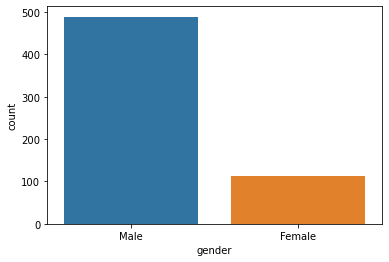

In [7]:
sns.countplot(x='gender',data=data)

<AxesSubplot:xlabel='married', ylabel='count'>

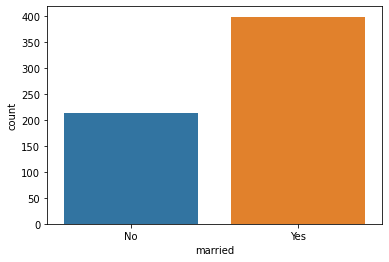

In [8]:
sns.countplot(x='married',data=data)

In [9]:
data['ch'].unique()

array([ 1.,  0., nan])

<AxesSubplot:xlabel='ch', ylabel='count'>

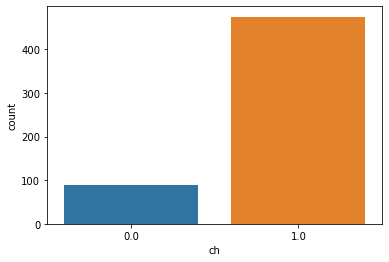

In [10]:
sns.countplot(x='ch',data=data)

In [11]:
data = data.dropna()

In [12]:
data.shape

(529, 6)

In [13]:
data1 = pd.get_dummies(data,drop_first=True) 

In [14]:
data1.head()

,ch,income,loanamt,gender_Male,married_Yes,status_Y
1,1.0,4583,128.0,1,1,0
2,1.0,3000,66.0,1,1,1
3,1.0,2583,120.0,1,1,1
4,1.0,6000,141.0,1,0,1
5,1.0,5417,267.0,1,1,1


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = data1.drop(['status_Y'],axis=1)
y = data1[['status_Y']]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 10,test_size = 0.3)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [20]:
model.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_test

,status_Y
382,1
514,0
462,1
28,0
352,1
...,...
201,1
560,1
351,0
365,0


In [23]:
model.score(X_train,y_train)

0.8513513513513513

In [24]:
model.score(X_test,y_test)

0.7421383647798742

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,mean_squared_error

In [26]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 18,  39],
       [  2, 100]], dtype=int64)

<AxesSubplot:>

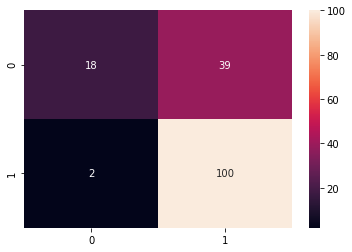

In [27]:
sns.heatmap(cfm,annot=True,fmt='d')

In [28]:
accuracy_score(y_test,y_pred)

0.7421383647798742

In [29]:
mean_squared_error(y_test,y_pred)

0.2578616352201258

In [30]:
from sklearn import svm

In [31]:
clf = svm.SVC()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [32]:
score = clf.score(X_test, y_test)
score

0.6415094339622641

In [33]:
from sklearn.metrics import classification_report

In [34]:
y_pred = model.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.32      0.47        57
           1       0.72      0.98      0.83       102

    accuracy                           0.74       159
   macro avg       0.81      0.65      0.65       159
weighted avg       0.78      0.74      0.70       159



In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
model = DecisionTreeClassifier()

In [39]:
param_grid ={
    'criterion' : ['gini','entropy'],
    'max_depth' : [2,3,4,5,6,7],
    'max_features':[4,5,6,7,8]
}

In [40]:
gridsearch = GridSearchCV(estimator=model,param_grid=param_grid,cv=10)

In [41]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': [4, 5, 6, 7, 8]})

In [42]:
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'max_features': 4}

In [43]:
best_model = gridsearch.best_estimator_

In [44]:
best_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=4)

In [45]:
gridsearch.best_score_

0.8513513513513512

In [46]:
best_model.score(X_test,y_test)

0.7358490566037735

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [48]:
param ={
    'criterion' : ['gini','entropy'],
    'max_depth' : randint(2,10),
    'max_features':randint(2,10)
}

In [49]:
model = DecisionTreeClassifier()

In [50]:
random_search = RandomizedSearchCV(estimator=model,param_distributions=param,cv=10,n_iter=20)

In [51]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C32E0544C0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C32E054DF0>})

In [52]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=4)

In [53]:
random_search.best_score_

0.8324324324324325

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.5660377358490566

In [68]:
my_submission = pd.DataFrame({'output(Y/N)': y_pred})

In [69]:
my_submission.to_csv('./Output_Loan_status.Venu')